# Sect 31: Intro to Time Series

## Learning Objectives:
- Learn how to load in timeseries data into pandas
- Learn how to plot timeseries in pandas
- Learn how to resample at different time frequencies
- Learn about types of time series trends and how to remove them.
- Learn about seasonal decomposition

 ## Questions to Revisit
 - Can you interpolate between missing datapoints?
 

## References

- [Pandas Timeseries Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)
- ['Timeseries Offset Aliases'](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases)
- [Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html

**REFERENCE CONTENTS:**
- Date StrFormatting
    - Used for:
        - Recognizing Date Formats (`pd.to_datetime`)
        - `dt_obj.strftime()`
        
- Pandas Frequency Aliases
    - Used for:
        - `df.resample()`
        - `df.asfreq()`
        - ...
        

### Date Str Formatting




Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

### Pandas Frequency Aliases


https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

|Alias	| Description|
| --- | --- |
|B |	business day frequency|
|C |	custom business day frequency|
|D |	calendar day frequency|
|W |	weekly frequency|
|M |	month end frequency|
|SM |	semi-month end frequency (15th and end of month)|
|BM |	business month end frequency|
|CBM |	custom business month end frequency|
|MS |	month start frequency|
|SMS |	semi-month start frequency (1st and 15th)|
|BMS |	business month start frequency|
|CBMS |	custom business month start frequency|
|Q |	quarter end frequency|
|BQ |	business quarter end frequency|
|QS |	quarter start frequency|
|BQS |	business quarter start frequency|
|A, Y |	year end frequency|
|BA, BY |	business year end frequency|
|AS, YS |	year start frequency|
|BAS, BYS |	business year start frequency|
|BH | business hour frequency|
|H | hourly frequency|
|T |  min	minutely frequency|
|S | secondly frequency|
|L |  ms	milliseconds|
|U |  us	microseconds|
|N | nanoseconds|

# Intro to Time Series

In [1]:
!pip install -U fsds_100719
# !pip install -U scikit-learn

from fsds_100719.imports import *

fsds_1007219  v0.5.8 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [4]:
df = fs.datasets.load_mod1_proj()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [7]:
date = pd.to_datetime(df['date'])
date

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [9]:
df['d_date'] = pd.to_datetime(df['date'])
display(df.head())
df.dtypes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,d_date
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014-10-13
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014-12-09
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015-02-25
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014-12-09
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015-02-18


id                        int64
date                     object
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
d_date           datetime64[ns]
dtype: object

In [10]:
df.set_index('d_date',inplace=True)
df.index

DatetimeIndex(['2014-10-13', '2014-12-09', '2015-02-25', '2014-12-09',
               '2015-02-18', '2014-05-12', '2014-06-27', '2015-01-15',
               '2015-04-15', '2015-03-12',
               ...
               '2014-08-25', '2015-01-26', '2014-10-14', '2015-03-26',
               '2015-02-19', '2014-05-21', '2015-02-23', '2014-06-23',
               '2015-01-16', '2014-10-15'],
              dtype='datetime64[ns]', name='d_date', length=21597, freq=None)

In [12]:
mpl.rcParams['figure.figsize'] = (12,6)

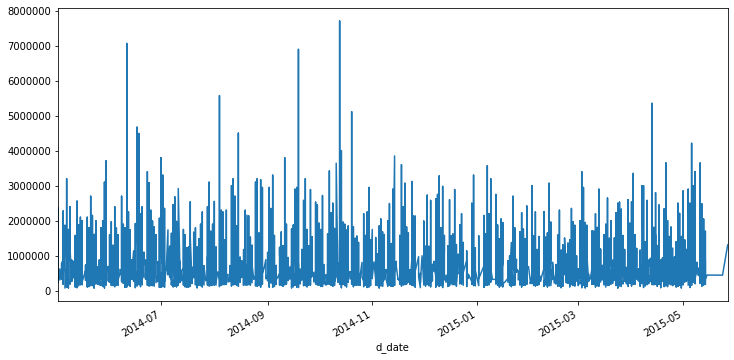

In [13]:
df['price'].plot()

### Slicing With Time Series

- Make sure you're index is sorted first'
- Feed in 2 dates as strings for slicing.
- Always use .loc when slicing dates

In [19]:
df.sort_index(inplace=True)

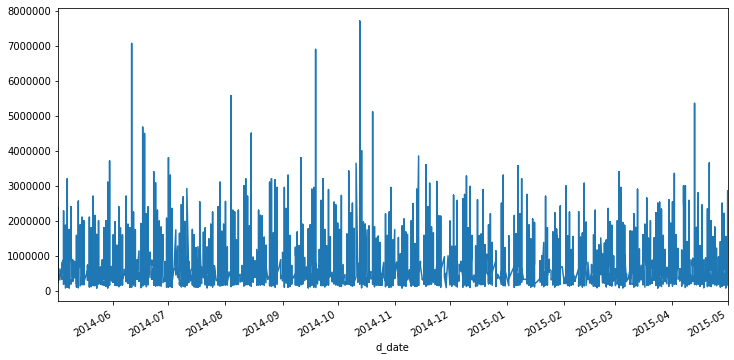

In [24]:
df.loc['2014-05-01':'2015-05-01','price'].plot().autoscale(axis='x',tight=True)

## Time series Frequencies


In [29]:
df.index

DatetimeIndex(['2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02',
               ...
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-14',
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-15',
               '2015-05-24', '2015-05-27'],
              dtype='datetime64[ns]', name='d_date', length=21597, freq=None)

In [36]:
df.index

DatetimeIndex(['2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02',
               ...
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-14',
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-15',
               '2015-05-24', '2015-05-27'],
              dtype='datetime64[ns]', name='d_date', length=21597, freq=None)

In [45]:
ts = df['price']

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


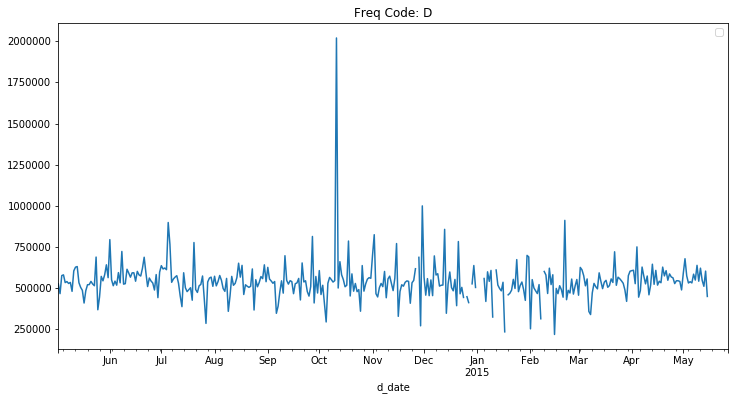

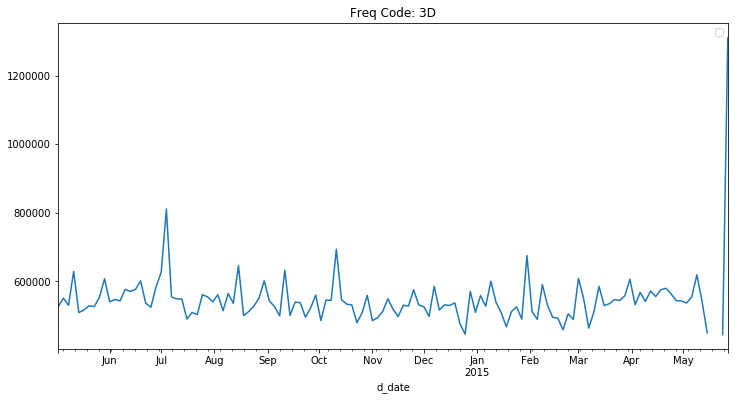

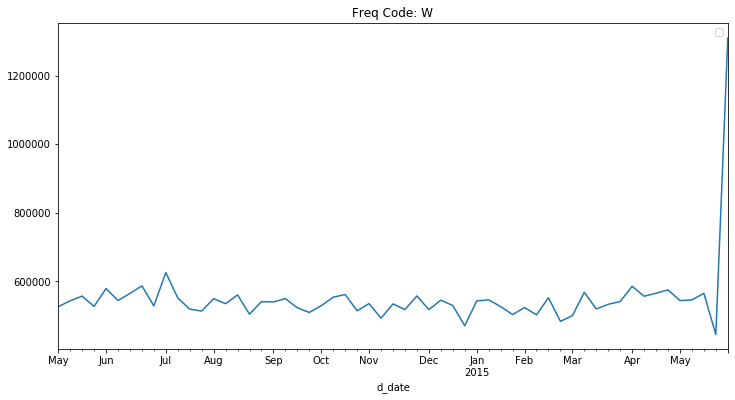

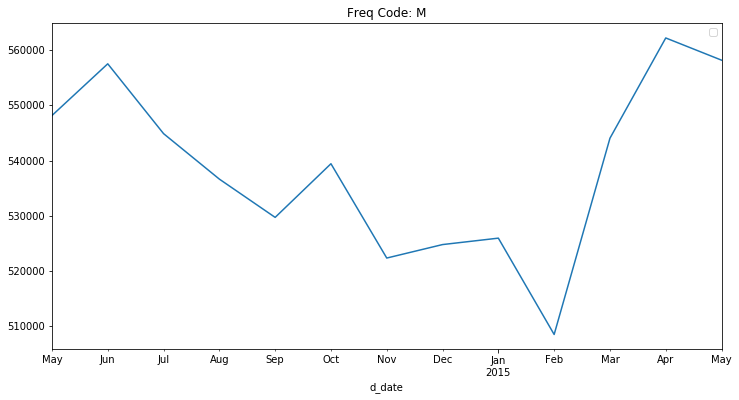

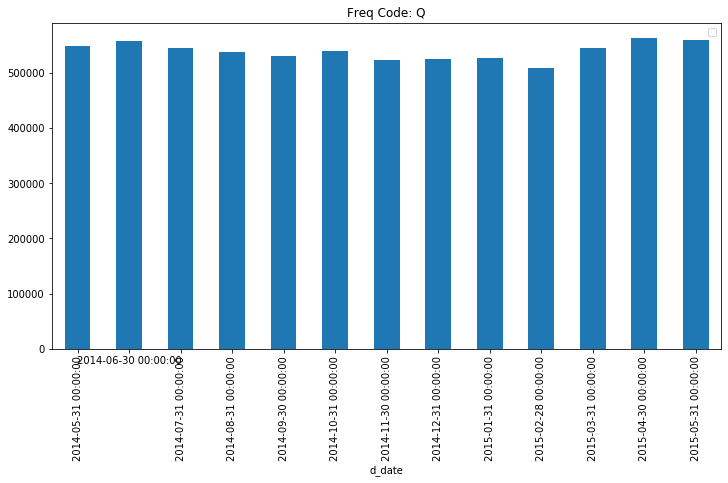

In [51]:
freq_codes = ['D','3D','W','M', 'Q']
for freq in freq_codes:
    plt.figure()
    title=f"Freq Code: {freq}"
    plt.legend()
    ts.resample(freq).mean().plot(title=title)
    
ax = ts.resample('M').mean().plot(kind='bar')

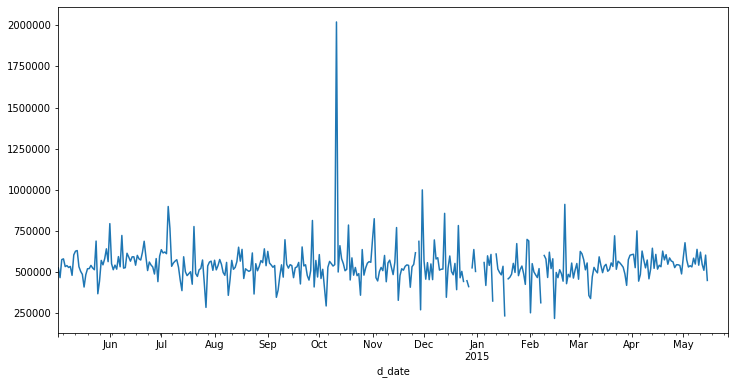

In [52]:
ts.resample('D').mean().plot()

## Using Datetime objects and apply statemements

In [66]:
display(df.head())
df.dtypes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
d_date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,2202500290,5/2/2014,435000.0,4,1.0,1450,8800,1.0,0.0,0.0,...,7,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942
2014-05-02,7853361370,5/2/2014,555000.0,4,2.5,3310,6500,2.0,0.0,0.0,...,8,3310,0.0,2012,0.0,98065,47.5150,-121.870,2380,5000
2014-05-02,7197300105,5/2/2014,550000.0,4,2.5,1940,10500,1.0,NaN,0.0,...,7,1140,800.0,1976,0.0,98052,47.6830,-122.114,2200,10500
2014-05-02,3438501320,5/2/2014,295000.0,2,2.5,1630,1368,2.0,0.0,0.0,...,7,1280,350.0,2009,0.0,98106,47.5489,-122.363,1590,2306
2014-05-02,472000620,5/2/2014,790000.0,3,2.5,2600,4750,1.0,0.0,0.0,...,9,1700,900.0,1951,0.0,98117,47.6833,-122.400,2380,4750


id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [77]:
t = df.index.to_series()[0]
display(t)
print(t)

Timestamp('2014-05-02 00:00:00')

2014-05-02 00:00:00


In [79]:
# help(t.strptime)

In [82]:
print(t.strftime("%m-%d-%Y"))
print(t.strftime("%T"))

05-02-2014
00:00:00


In [86]:
df.index

DatetimeIndex(['2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02', '2014-05-02', '2014-05-02',
               '2014-05-02', '2014-05-02',
               ...
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-14',
               '2015-05-14', '2015-05-14', '2015-05-14', '2015-05-15',
               '2015-05-24', '2015-05-27'],
              dtype='datetime64[ns]', name='d_date', length=21597, freq=None)

In [87]:
df['month'] = df.index.to_series().apply(lambda x: x.month)
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
d_date,,,,,,,,,,,,,,,,,,,,,
2014-05-02,2202500290,5/2/2014,435000.0,4,1.0,1450,8800,1.0,0.0,0.0,...,1450,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942,5
2014-05-02,7853361370,5/2/2014,555000.0,4,2.5,3310,6500,2.0,0.0,0.0,...,3310,0.0,2012,0.0,98065,47.5150,-121.870,2380,5000,5
2014-05-02,7197300105,5/2/2014,550000.0,4,2.5,1940,10500,1.0,NaN,0.0,...,1140,800.0,1976,0.0,98052,47.6830,-122.114,2200,10500,5
2014-05-02,3438501320,5/2/2014,295000.0,2,2.5,1630,1368,2.0,0.0,0.0,...,1280,350.0,2009,0.0,98106,47.5489,-122.363,1590,2306,5
2014-05-02,472000620,5/2/2014,790000.0,3,2.5,2600,4750,1.0,0.0,0.0,...,1700,900.0,1951,0.0,98117,47.6833,-122.400,2380,4750,5


In [89]:
## Let's make a month column to groupby
df['month_int'] = df.index.to_series().apply(lambda x: x.month) #x
df['month_name'] =df.index.to_series().apply(lambda x:x.strftime("%B"))

for col in ['month_int','month_name']:
    display(df[col].value_counts(normalize=True))

5     0.111775
4     0.103209
7     0.102375
6     0.100847
8     0.089781
10    0.086864
3     0.086818
9     0.082002
12    0.068065
11    0.065241
2     0.057740
1     0.045284
Name: month_int, dtype: float64

May          0.111775
April        0.103209
July         0.102375
June         0.100847
August       0.089781
October      0.086864
March        0.086818
September    0.082002
December     0.068065
November     0.065241
February     0.057740
January      0.045284
Name: month_name, dtype: float64

In [ ]:
url = "https://en.wikipedia.org/wiki/2015_Baltimore_protests"
pre_riot = crime_2014.loc['2015':'2016']
pre_riot

In [73]:
df.index.to_series().apply(lambda x: x.month)

d_date
2014-05-02    5
2014-05-02    5
2014-05-02    5
2014-05-02    5
2014-05-02    5
             ..
2015-05-14    5
2015-05-14    5
2015-05-15    5
2015-05-24    5
2015-05-27    5
Name: d_date, Length: 21597, dtype: int64

In [58]:
help(ax.xaxis.set_ticklabels)

Help on method set_ticklabels in module matplotlib.axis:

set_ticklabels(ticklabels, *args, minor=False, **kwargs) method of matplotlib.axis.XAxis instance
    Set the text values of the tick labels.
    
    Parameters
    ----------
    ticklabels : sequence of str or of `Text`\s
        List of texts for tick labels; must include values for non-visible
        labels.
    minor : bool
        If True, set minor ticks instead of major ticks.
    **kwargs
        Text properties.
    
    Returns
    -------
    labels : list of `Text`\s
        For each tick, includes ``tick.label1`` if it is visible, then
        ``tick.label2`` if it is visible, in that order.



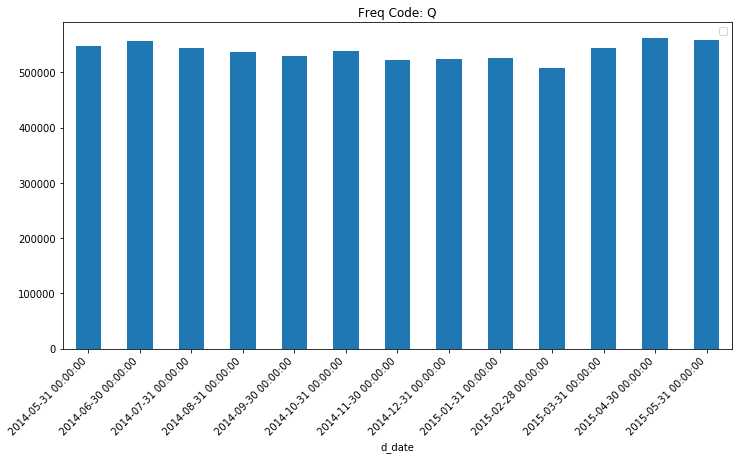

In [63]:
fig = ax.get_figure()

ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(),**{'rotation':45,
                                                    'ha':'right'}) 
fig

In [74]:
# df.resample('D').fillna(method='ffill')

In [28]:
# df.loc['2014-05-01':]['price'].plot()#,'price']

In [16]:
# df['price'].hist(bins='auto')

## Time Series Calculations


### Rolling Statistics

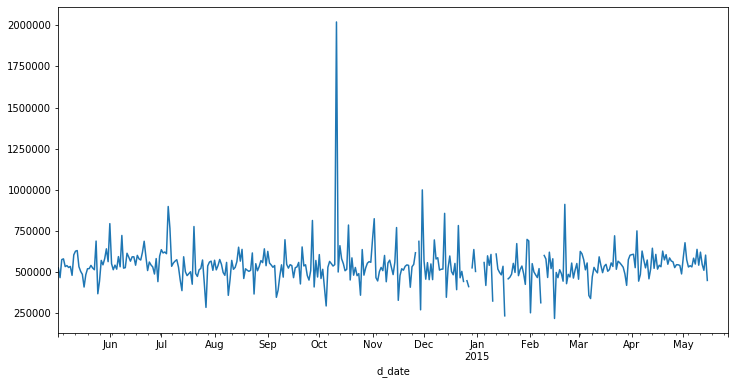

In [100]:
ts_mean = ts.resample('D').mean()
ts_mean.rolling(window=7).mean().head(20)
ts_mean.plot()

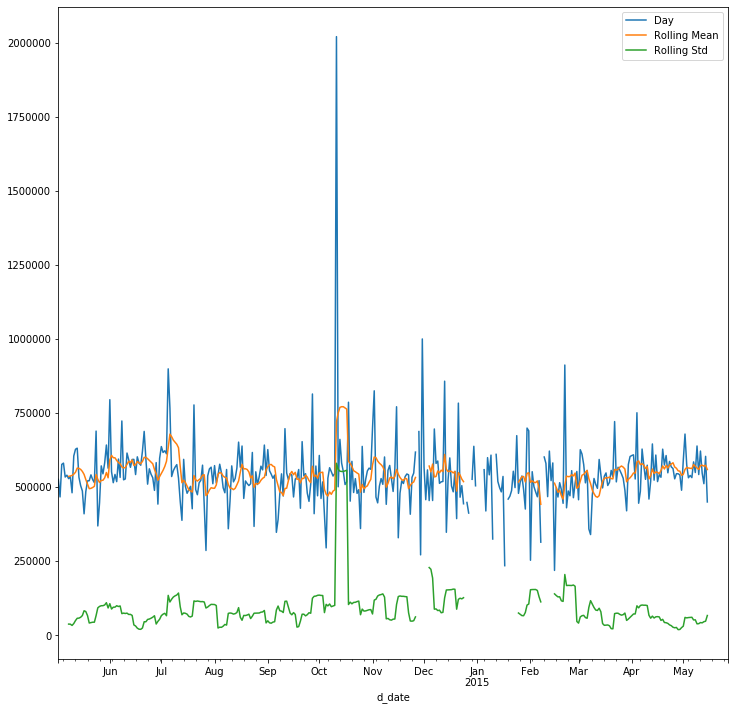

In [106]:
plt.figure(figsize=(12,12))
ts_mean = ts.resample('D').mean()
ts_mean.plot(label='Day')

ts_mean.rolling(window=7).mean().plot(label='Rolling Mean')
ts_mean.rolling(window=7).std().plot(label='Rolling Std')

plt.legend()

In [115]:
ts_mean.fillna(method='ffill',inplace=True)

In [116]:
from statsmodels.tsa.stattools import adfuller
adfuller(ts_mean)#.fillna(method='ffill'))


(-18.75304124383,
 2.0273774397840847e-30,
 0,
 390,
 {'1%': -3.4472291365835566,
  '5%': -2.8689795375849223,
  '10%': -2.5707330834976987},
 9848.746524747772)

In [122]:
## Lab Function
def stationarity_check(TS,plot=True,col=None):
    """From: https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/time-series-decomposition
    """
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller

    if col is not None:
        # Perform the Dickey Fuller Test
        dftest = adfuller(TS[col]) # change the passengers column as required 
    else:
        dftest=adfuller(TS)
 
    if plot:
        # Calculate rolling statistics
        rolmean = TS.rolling(window = 8, center = False).mean()
        rolstd = TS.rolling(window = 8, center = False).std()

        #Plot rolling statistics:
        fig = plt.figure(figsize=(12,6))
        orig = plt.plot(TS, color='blue',label='Original')
        mean = plt.plot(rolmean, color='red', label='Rolling Mean')
        std = plt.plot(rolstd, color='black', label = 'Rolling Std')
        plt.legend(loc='best')
        plt.title('Rolling Mean & Standard Deviation')
#     plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print ('Results of Dickey-Fuller Test:')

    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    dfoutput['sig'] = dfoutput['p-value']<.05
    print (dfoutput)
    
    return dfoutput

Results of Dickey-Fuller Test:
Test Statistic                -1.875304e+01
p-value                        2.027377e-30
#Lags Used                     0.000000e+00
Number of Observations Used    3.900000e+02
Critical Value (1%)           -3.447229e+00
Critical Value (5%)           -2.868980e+00
Critical Value (10%)          -2.570733e+00
sig                            1.000000e+00
dtype: float64


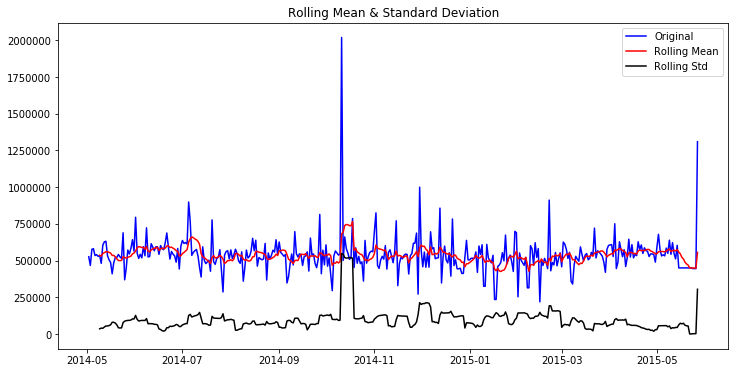

In [123]:
stationarity_check(ts_mean);

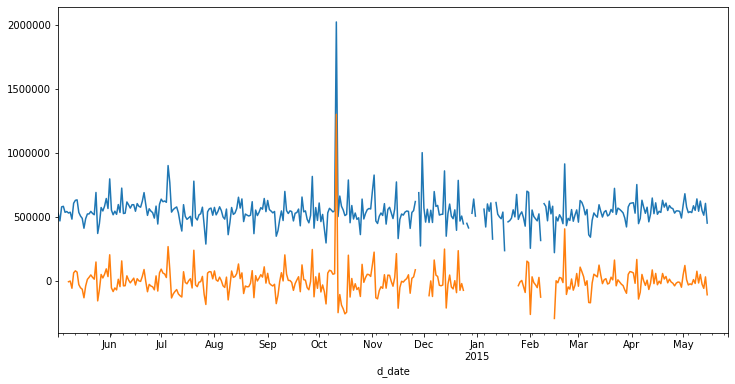

In [109]:
ts_cleaned = ts_mean-ts_mean.rolling(7).mean()
ts_mean.plot()
ts_cleaned.plot()

## Time Series Trends

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-online-ds-ft-100719/master/images/new_trendseasonal.png" width=50%>

### Stationarity

<div style="text-align:center;font-size:2em">Mean</div>
    
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_mean_nonstationary.png" width=70%>
<br><br>
<div style="text-align:center;font-size:3em">Variance</div>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-types-of-trends-online-ds-ft-100719/master/images/new_cov_nonstationary.png" width=70%>
</div>

### Types of Trends


- https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/working-with-time-series-data/types-of-trends

### Removing Trends 
- .diff()
- subtract rolling mean
- seasonal decomposition

## New ts datasets to test

In [ ]:
# baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
# std_rates = "https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/STD%20Cases.csv"
# no_sex_xlsx = "https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/Americans%20Sex%20Frequency.xlsx"

learn_passengers="https://raw.githubusercontent.com/learn-co-students/dsc-removing-trends-lab-online-ds-ft-100719/master/passengers.csv"

## Baltimore Crime

In [124]:
baltimore_crime ="https://raw.githubusercontent.com/jirvingphd/fsds_100719/master/fsds_100719/data/BPD_Part_1_Victim_Based_Crime_Data.csv"
df = pd.read_csv(baltimore_crime,low_memory=False,parse_dates=True)
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
1,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
4,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1


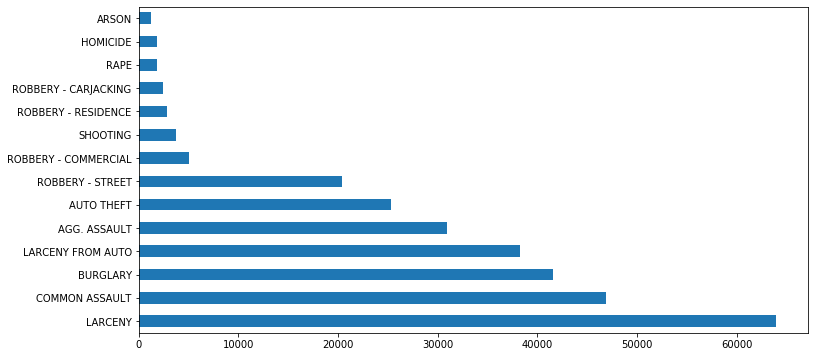

In [126]:
df["Description"].value_counts().plot(kind='barh')

In [128]:
df['date'] = pd.to_datetime(df['CrimeDate'])
df.set_index('date',inplace=True)

In [129]:
df

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
date,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,HOMICIDE,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,39.0,NaN,HOSPITAL,NaN,1
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,ROBBERY - STREET,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,39.0,NaN,STREET,NaN,1
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,ROBBERY - RESIDENCE,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,AGG. ASSAULT,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,39.0,NaN,STREET,NaN,1
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,BURGLARY,O,NaN,523,NORTHERN,ROSEBANK,-77.0,39.0,NaN,OTHER - OUTSIDE,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01,01/01/1978,10:30:00,2A,1900 ARGONNE DR,RAPE,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1977-05-01,05/01/1977,00:01:00,2A,600 W 34TH ST,RAPE,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,39.0,NaN,ROW/TOWNHOUSE-OCC,NaN,1
1975-06-01,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,RAPE,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,39.0,NaN,OTHER - INSIDE,NaN,1


In [130]:
df_crimes = pd.get_dummies(df,columns=['Description'])
df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,...,Description_COMMON ASSAULT,Description_HOMICIDE,Description_LARCENY,Description_LARCENY FROM AUTO,Description_RAPE,Description_ROBBERY - CARJACKING,Description_ROBBERY - COMMERCIAL,Description_ROBBERY - RESIDENCE,Description_ROBBERY - STREET,Description_SHOOTING
date,,,,,,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,...,0,1,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,...,0,0,0,0,0,0,0,0,1,0
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,...,0,0,0,0,0,0,0,1,0,0
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,...,0,0,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,O,NaN,523,NORTHERN,ROSEBANK,-77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01,01/01/1978,10:30:00,2A,1900 ARGONNE DR,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,...,0,0,0,0,1,0,0,0,0,0
1977-05-01,05/01/1977,00:01:00,2A,600 W 34TH ST,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,...,0,0,0,0,1,0,0,0,0,0
1975-06-01,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,...,0,0,0,0,1,0,0,0,0,0


___

In [131]:
crime_cols = [col for col in df_crimes.columns if 'Description_' in col]
crime_cols


['Description_AGG. ASSAULT',
 'Description_ARSON',
 'Description_AUTO THEFT',
 'Description_BURGLARY',
 'Description_COMMON ASSAULT',
 'Description_HOMICIDE',
 'Description_LARCENY',
 'Description_LARCENY FROM AUTO',
 'Description_RAPE',
 'Description_ROBBERY - CARJACKING',
 'Description_ROBBERY - COMMERCIAL',
 'Description_ROBBERY - RESIDENCE',
 'Description_ROBBERY - STREET',
 'Description_SHOOTING']

In [135]:
new_names = [x.replace('Description_','') for x in crime_cols]
rename_dict = dict(zip(crime_cols,new_names))
rename_dict
df_crimes.rename(rename_dict,axis=1,inplace=True)
df_crimes

,CrimeDate,CrimeTime,CrimeCode,Location,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,...,COMMON ASSAULT,HOMICIDE,LARCENY,LARCENY FROM AUTO,RAPE,ROBBERY - CARJACKING,ROBBERY - COMMERCIAL,ROBBERY - RESIDENCE,ROBBERY - STREET,SHOOTING
date,,,,,,,,,,,,,,,,,,,,,
2019-12-14,12/14/2019,00:26:00,1A,2400 W BELVEDERE AV,Outside,FIREARM,532,NORTHERN,LEVINDALE,-77.0,...,0,1,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,07:30:00,3B,600 S MONROE ST,O,NaN,934,SOUTHERN,CARROLLTON RIDGE,-77.0,...,0,0,0,0,0,0,0,0,1,0
2019-12-14,12/14/2019,14:30:00,3JK,3000 E MONUMENT ST,I,KNIFE,333,EASTERN,ELLWOOD PARK/MONUMEN,-77.0,...,0,0,0,0,0,0,0,1,0,0
2019-12-14,12/14/2019,14:15:00,4A,1100 MCCULLOH ST,O,FIREARM,123,CENTRAL,LOWER HERRING RUN PARK,-77.0,...,0,0,0,0,0,0,0,0,0,0
2019-12-14,12/14/2019,04:03:00,5E,400 E BELVEDERE AVE,O,NaN,523,NORTHERN,ROSEBANK,-77.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-01-01,01/01/1978,10:30:00,2A,1900 ARGONNE DR,I,OTHER,421,NORTHEAST,MORGAN STATE UNIVERS,-77.0,...,0,0,0,0,1,0,0,0,0,0
1977-05-01,05/01/1977,00:01:00,2A,600 W 34TH ST,I,OTHER,531,NORTHERN,WYMAN PARK,-77.0,...,0,0,0,0,1,0,0,0,0,0
1975-06-01,06/01/1975,00:00:00,2A,4400 OLD FREDERICK RD,I,OTHER,822,SOUTHWEST,UPLANDS,-77.0,...,0,0,0,0,1,0,0,0,0,0


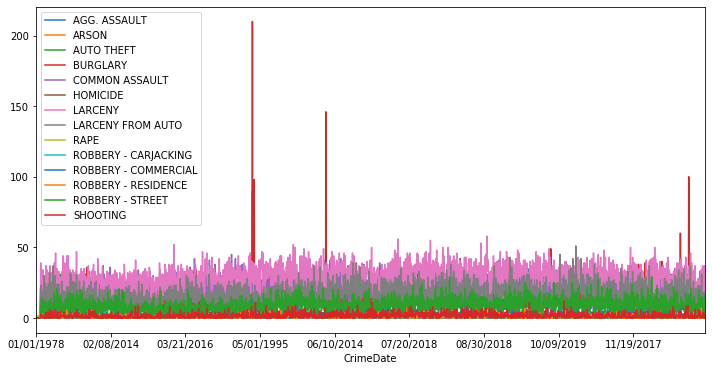

In [136]:
df_crimes.groupby('CrimeDate').sum()[new_names].plot()

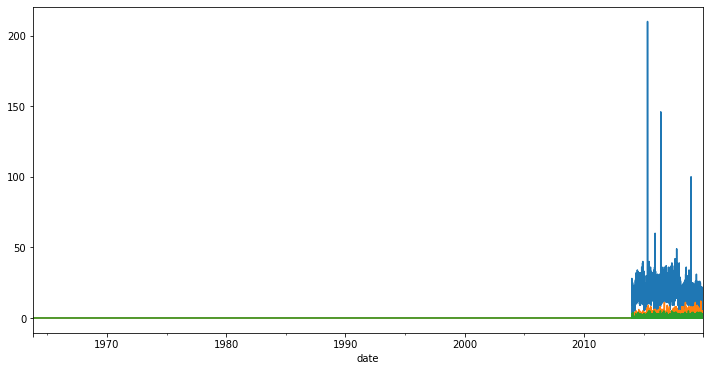

In [167]:
df_crimes['BURGLARY'].resample('D').sum().plot()
df_crimes['SHOOTING'].resample('D').sum().plot()
df_crimes['HOMICIDE'].resample('D').sum().plot()


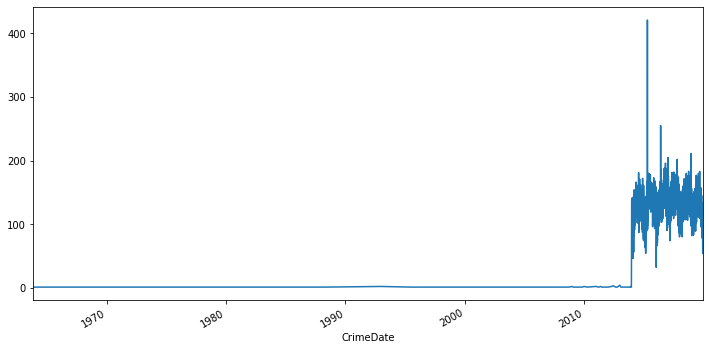

In [160]:
df_counts = df_crimes.groupby('CrimeDate').count()[new_names]
df_counts.index = pd.to_datetime(df_counts.index)
df_counts['BURGLARY'].plot()

In [142]:
df_counts.sort_index(inplace=True)

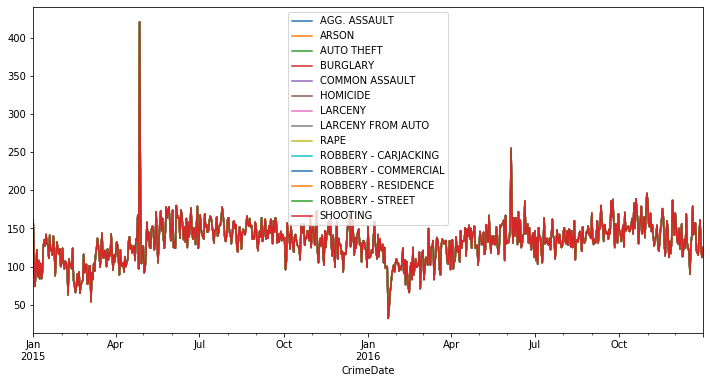

In [151]:
# df_counts.loc['2014':].plot()
# plt.legend(None)
df_2015 = df_counts.loc['2015':'2016']
ax = df_2015.plot()
fig=ax.get_figure()

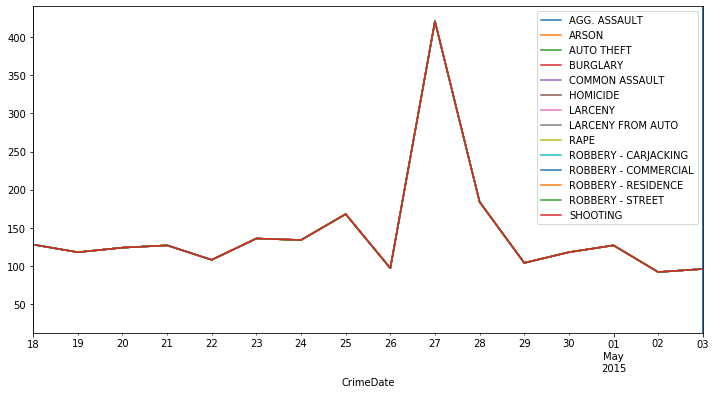

In [159]:
riots_start ='2015-04-18' 
ax.axvline(riots_start)

riots_end = '2015-05-03' 
ax.axvline(riots_end)

ax.set_xlim(riots_start,riots_end)

In [150]:
df_2015.idxmax()

AGG. ASSAULT           2015-04-27
ARSON                  2015-04-27
AUTO THEFT             2015-04-27
BURGLARY               2015-04-27
COMMON ASSAULT         2015-04-27
HOMICIDE               2015-04-27
LARCENY                2015-04-27
LARCENY FROM AUTO      2015-04-27
RAPE                   2015-04-27
ROBBERY - CARJACKING   2015-04-27
ROBBERY - COMMERCIAL   2015-04-27
ROBBERY - RESIDENCE    2015-04-27
ROBBERY - STREET       2015-04-27
SHOOTING               2015-04-27
dtype: datetime64[ns]

# Seasonal Decomposition

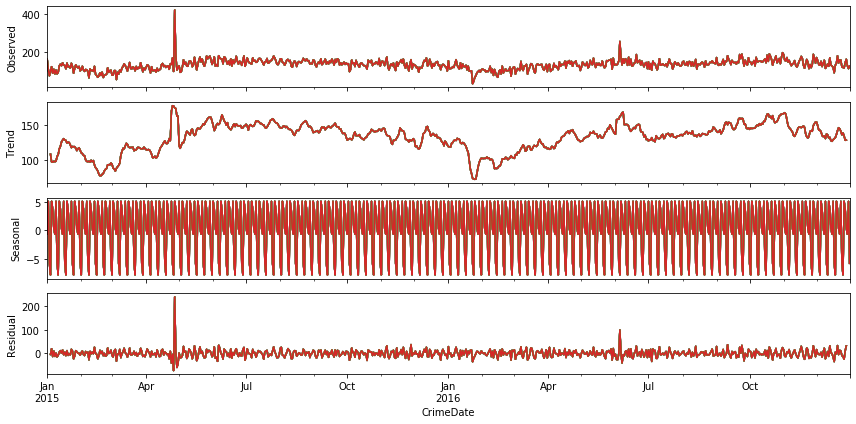

In [156]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(df_2015).plot();

In [154]:
# url = "https://en.wikipedia.org/wiki/2015_Baltimore_protests"
# pre_riot = crime_2014.loc['2015':'2016']
# pre_riot